<a href="https://colab.research.google.com/github/Alex9295/Bestsellers_DataFrames/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import core libraries for data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset from CSV into a pandas DataFrame
data = pd.read_csv('creditcard.csv')

In [4]:
# Preview the first rows to confirm the dataset loaded
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
# Check class imbalance (fraud vs. non-fraud) to understand baseline distribution
print(data['Class'].value_counts()/len(data))

Class
0.0    0.998182
1.0    0.001814
Name: count, dtype: float64


In [6]:
# Check for missing values in each column
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       1
Amount    1
Class     1
dtype: int64


In [7]:
# Remove rows with missing values (if any) so downstream models don't error
data = data.dropna(axis=0)

In [9]:
# Compute IQR for 'Amount' to flag potential outliers
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
# Identify outlier transactions based on the IQR rule
outliers = data[(data['Amount'] < (Q1 - 1.5 * IQR)) | (data['Amount'] > (Q3 + 1.5 * IQR))]

Text(0.5, 1.0, 'Transaction Amount Distribution')

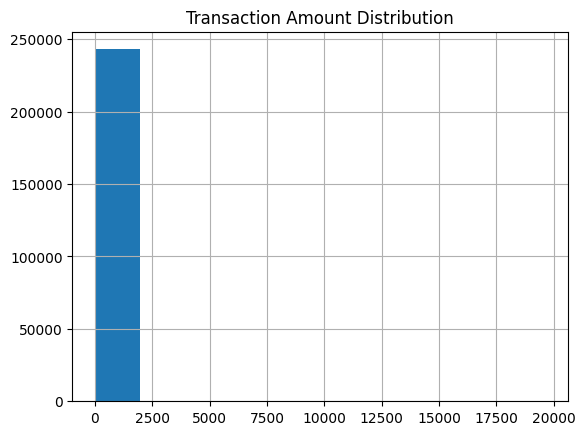

In [11]:
# Visualize the distribution of transaction amount
data['Amount'].hist()
plt.title('Transaction Amount Distribution')

<Axes: >

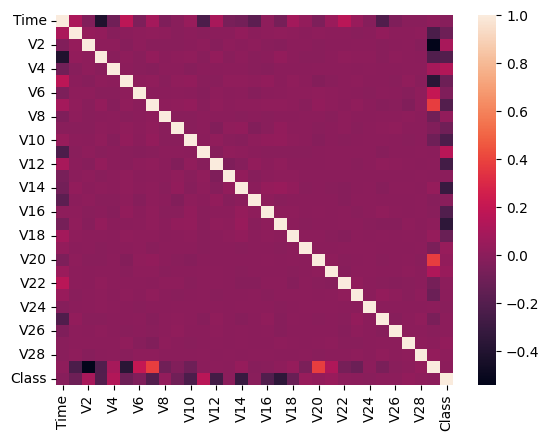

In [12]:
# Compute and visualize the correlation matrix to spot relationships between features
corr = data.corr()
sns.heatmap(corr)

In [13]:
# Handle class imbalance by oversampling the minority class with SMOTE
from imblearn.over_sampling import SMOTE

X = data.drop('Class', axis=1)
y = data['Class']
oversampler = SMOTE(k_neighbors=1)
X_smote, y_smote = oversampler.fit_resample(X, y)

In [14]:
# Split the balanced data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [17]:
# Train a baseline Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [18]:
# Evaluate the baseline model using precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X_valid)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

In [20]:
# Code cell
print('Precision:', precision)
print('Recall :', recall )
print('f1 Score:', f1)

Precision: 0.9904096297442099
Recall : 0.9672196434947403
f1 Score: 0.978677282864706


In [ ]:
# Train additional tree-based models and create a simple ensemble
# Train two models and combine their predictions with a simple majority-vote ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Train model 1
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Train model 2
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Ensemble predictions
y_pred_ensemble = (rf.predict(X_valid) + gb.predict(X_valid)) / 2

In [ ]:
# Try anomaly detection with Isolation Forest (unsupervised)
from sklearn.ensemble import IsolationForest

anomaly_model = IsolationForest(contamination=0.01)
anomaly_model.fit(X_train)

anomaly_scores = anomaly_model.decision_function(X_valid)

# Define the threshold based on your requirements
threshold = -0.5

anomalies = anomaly_scores < threshold

In [ ]:
# Optional deep learning experiment (advanced / optional section)
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

X_train_array = X_train.values
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
num_timesteps = X_train_reshaped.shape[1]
num_features = X_train_reshaped.shape[2]

model = Sequential()
model.add(LSTM(64, input_shape=(num_timesteps, num_features)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_reshaped, y_train, epochs=5)

In [ ]:
# Code cell
num_features = X_valid.shape[1]
input = Input(shape=(num_features,))
encoded = Dense(32, activation='relu')(input)
decoded = Dense(num_features, activation='sigmoid')(encoded)

autoencoder = Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

recon_err = autoencoder.evaluate(X_valid)
anomalies = recon_err > threshold

In [ ]:
# Optional deep learning experiment
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input

# Assuming you have your features in X and labels in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the training data
X_train_array = X_train.values
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)

# Reshape the test data
X_test_array = X_test.values
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

num_timesteps = X_train_reshaped.shape[1]
num_features = X_train_reshaped.shape[2]

model = Sequential()
model.add(LSTM(64, input_shape=(num_timesteps, num_features)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training data and validate on the test data
model.fit(X_train_reshaped, y_train, epochs=5, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on the test data
scores = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test loss: {scores[0]} / Test accuracy: {scores[1]}')


In [ ]:
# Inspect feature importances from Gradient Boosting
importances = gb.feature_importances_
print(importances)

In [ ]:
# Plot feature importances for interpretability
plt.barh(X.columns, importances)
plt.title('Gradient Boost Feature Importances')

In [ ]:
# Importing the necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pickle
from flask import Flask, request, jsonify
# Assuming you have your features in X and labels in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Reshape the training data
X_train_array = X_train.values
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
# Reshape the test data
X_test_array = X_test.values
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

num_timesteps = X_train_reshaped.shape[1]
num_features = X_train_reshaped.shape[2]

model = Sequential()
model.add(LSTM(64, input_shape=(num_timesteps, num_features)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training data and validate on the test data
model.fit(X_train_reshaped, y_train, epochs=5, validation_data=(X_test_reshaped, y_test))
# Evaluating the model
scores = model.evaluate(X_test, y_test)
print(f'Test Loss: {scores[0]}')
print(f'Test Accuracy: {scores[1]}')

In [ ]:
# Saving the trained model using pickle
pickle.dump(model, open('fraud_detection_model.pkl', 'wb'))

# Flask application for deployment
app = Flask(__name__)

# Endpoint for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Load the saved model
    loaded_model = pickle.load(open('fraud_detection_model.pkl', 'rb'))

    # Get the input data from the request
    data = request.get_json()
    input_data = np.array(data['input'])

    # Preprocess the input data as required
    input_data = np.reshape(input_data, (1, input_data.shape[0], 1))

    # Make predictions using the loaded model
    predictions = loaded_model.predict(input_data)

    # Return the predictions as a response
    return jsonify({'predictions': predictions.tolist()})

In [ ]:
# Running the Flask application on a web server
if __name__ == '__main__':
    app.run()